# Play with models

In [1]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph,Kingdom,Occurrence
from drivers.graph_models import Cell,Mex4km, countObjectsOf
from drivers.graph_models import pickNode
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
import numpy as np
import pymc3 as pm

## Use the ggplot style
plt.style.use('ggplot')

/opt/conda/envs/biospytial/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import scipy

In [148]:
## true parameters
m = 2.5
b = 10
n = 500
tau2 = 1 
alpha = 10
x = np.linspace(-10,10,n)
eps = scipy.random.normal(0,tau2,n)
per = np.sin(alpha * x) 
y = m*x + b + per + eps 
#y = per + eps 

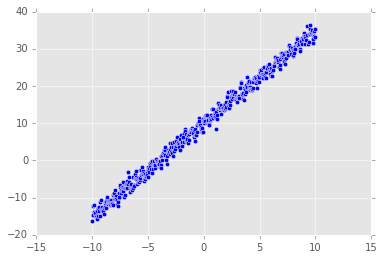

In [149]:
#plt.plot(y)
plt.scatter(x,y)

In [152]:
## Ok let's do the model in Pymc3
with pm.Model() as model:
    tau2 = pm.HalfCauchy('tau',beta=3,testval=1)
    m = pm.Normal('slope', 0, sd=10)
    #alpha = pm.HalfCauchy('alpha',beta=10)
    #alpha = pm.Flat('alpha')
    alpha = pm.Cauchy('alpha',0,100)
    #b = pm.Normal('b',30,sd=1)
    b = pm.Flat('b')
    # Likelihood
    likelihood = pm.Normal('y',mu=m*x + b + pm.math.sin(alpha*x) ,sd=tau2,observed=y)
    

In [153]:
with model:
        trace = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, alpha, slope, tau_log__]
100%|██████████| 3500/3500 [00:21<00:00, 164.95it/s]
The acceptance probability does not match the target. It is 0.8819770968481965, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8902451686847429, but should be close to 0.8. Try to increase the number of tuning steps.


In [154]:
with model:
    map_ = pm.find_MAP()

logp = -861.6, ||grad|| = 0.30907: 100%|██████████| 44/44 [00:00<00:00, 1426.81it/s]  


In [155]:
map_

{'alpha': array(-4.59380032),
 'b': array(9.98482052),
 'slope': array(2.50144248),
 'tau': array(1.32640824),
 'tau_log__': array(0.28247472)}